<a href="https://colab.research.google.com/github/0xmennatullah/PyTorch/blob/main/ch_4_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch4: custom datasets

## 0. agnostics

In [ ]:
import torch
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

image_path.mkdir(parents=True, exist_ok=True)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)

## 2. perparation

In [ ]:
import os
def walkthrough(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"{len(dirnames)} dir, {len(filenames)} images in '{dirpath}'.")

In [ ]:
walkthrough(image_path)

2 dir, 0 images in 'data/pizza_steak_sushi'.
3 dir, 0 images in 'data/pizza_steak_sushi/train'.
0 dir, 78 images in 'data/pizza_steak_sushi/train/pizza'.
0 dir, 75 images in 'data/pizza_steak_sushi/train/steak'.
0 dir, 72 images in 'data/pizza_steak_sushi/train/sushi'.
3 dir, 0 images in 'data/pizza_steak_sushi/test'.
0 dir, 25 images in 'data/pizza_steak_sushi/test/pizza'.
0 dir, 19 images in 'data/pizza_steak_sushi/test/steak'.
0 dir, 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 visualizing image

pizza


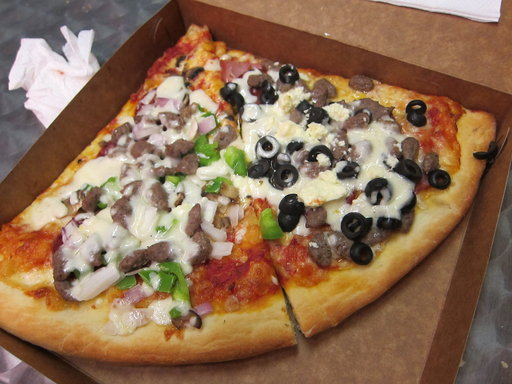

In [ ]:
import random
from PIL import Image
random.seed(42)
image_pathl = list(image_path.glob("*/*/*.jpg"))
rand_img = random.choice(image_pathl)
img_class = rand_img.parent.stem
img = Image.open(rand_img)
print(img_class)
img

## 3. transforming data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 transform

In [ ]:
data_trans = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()

])

In [ ]:
import matplotlib.pyplot as plt

def plot_trans(image_paths, transform, n=3, seed=42):
  random.seed(seed)
  rand_imgp = random.sample(image_paths, k=n)
  for imgp in rand_imgp:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title("original size")
      ax[0].axis("off")

      trans_img = transform(f).permute(1,2,0)
      ax[1].imshow(trans_img)
      ax[1].set_title("trans size")
      ax[1].axis("off")

      fig.subtitle(f"class: {image_path.parent.stem}", fontsize=16)
      plot_trans(image_pathl, transformr = data_transform, n=3)

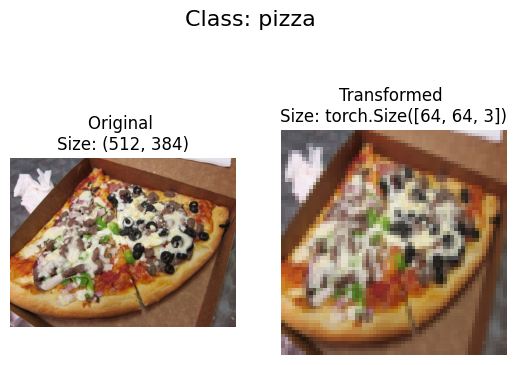

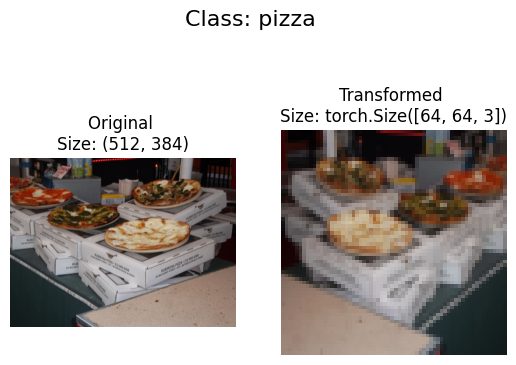

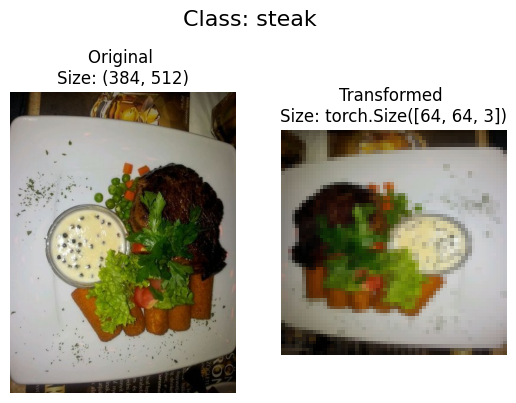

In [ ]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_pathl,
                        transform=data_trans,
                        n=3)

## 4. Image folder

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_trans,
                                  target_transform = None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_trans)
print(f"train: {train_data}, test: {test_data}")

train: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ), test: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"img: tensor {img}")
print(f"img shape: {img.shape}")
print(f"img datatype: {img.dtype}")
print(f"lable: {label}")
print(f"label dt: {type(label)}")

img: tensor tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902

Text(0.5, 1.0, 'pizza')

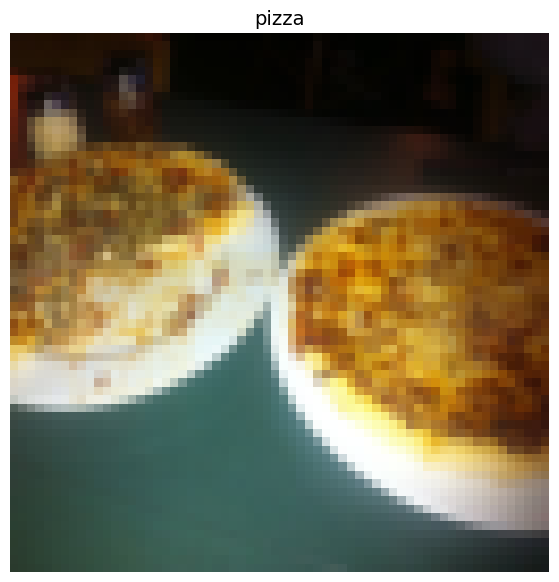

In [ ]:
#rearrange tensor =>permute
#to align with matplotlib

img_perm = img.permute(1,2,0)
plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label], fontsize =14)


### 4.1 dataloader

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7aee75680190>,
 <torch.utils.data.dataloader.DataLoader at 0x7aee777dbf10>)

## 5. custom dataset

In [ ]:
import os
import pathlib, torch
from PIL import Image
from torch.utils.data import dataset
from torchvision import transforms
from typing import Tuple, Dict, List

### 5.1 helper func

In [ ]:
target_dir = train_dir
class_names_f = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(class_names_f)

['pizza', 'steak', 'sushi']


In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError("couldn't find classes")
  class_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_idx


In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 custom ImageFolder

In [ ]:
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir: str, transform=None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.classes, self.class_to_idx = find_classes(targ_dir)
    self.transform = transform

  def load_image(self, index:int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([transforms.Resize((64,64)),
                                      transforms.ToTensor()])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir= train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir= test_dir,
                                      transform=train_transforms)

In [ ]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


### 5.3 display func

In [ ]:
def display_random_img(dataset: torch.utils.data.dataset.Dataset,
                       classes: List[str] = None,
                       n: int = 10,
                       display_shape: bool = True,
                       seed: int = None):
  if n > 10:
    n = 10
    display_shape = False
    print("n can't be >10")

  if seed:
    random.seed(seed)

  random_sample_idx = random.sample(range(len(dataset)), k=n)
  plt.figure(figsize=(16,8))

  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    targ_img_adj = targ_image.permute(1,2,0)
    plt.subplot(1,n,i+1)
    plt.imshow(targ_img_adj)
    plt.axis("off")
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title+ f"\nshape: {targ_img_adj.shape}"
    plt.title(title)

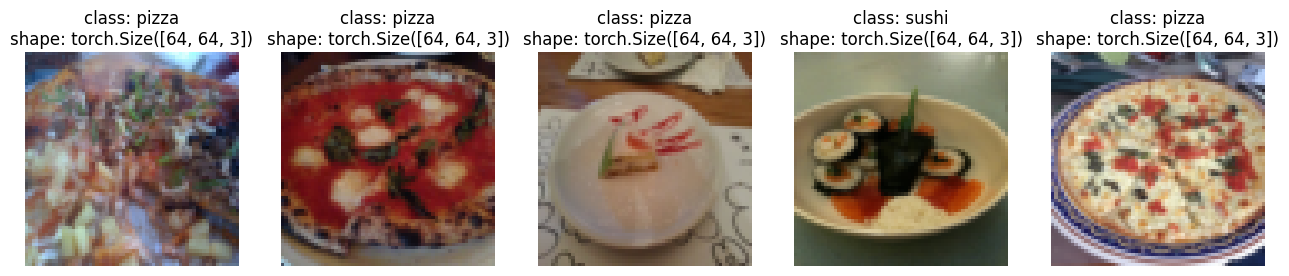

In [ ]:
display_random_img(train_data,
                   n=5,
                   classes=class_names,
                   seed = None)

n can't be >10


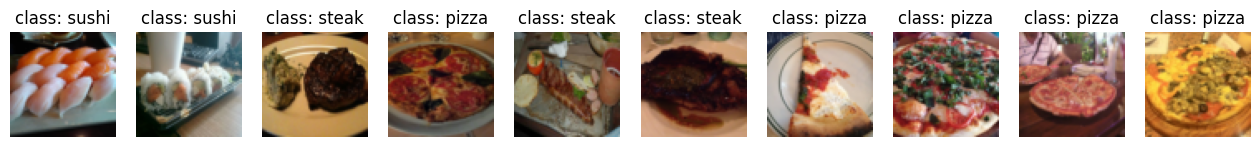

In [ ]:
display_random_img(train_data_custom,
                   n=12,
                   classes=class_names,
                   seed=None)

### 5.4 custom img => data loader

In [ ]:
from torch.utils.data import DataLoader
train_dlc = DataLoader(dataset=train_data_custom,
                       batch_size=1,
                       num_workers = 0,
                       shuffle=True)
test_dlc = DataLoader(dataset=test_data_custom,
                       batch_size=1,
                       num_workers = 0,
                       shuffle=False)

train_dlc, test_dlc

(<torch.utils.data.dataloader.DataLoader at 0x7aef75cbb010>,
 <torch.utils.data.dataloader.DataLoader at 0x7aee75491150>)

In [ ]:
img_custom, label_custom = next(iter(train_dlc))
print(f"img shape: {img_custom.shape}, label: {label_custom}")

img shape: torch.Size([1, 3, 64, 64]), label: tensor([0])


## 6. data augmentation

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize((244,244)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()])
test_transforms = transforms.Compose([
    transforms.Resize((244,244)),
    transforms.ToTensor()])

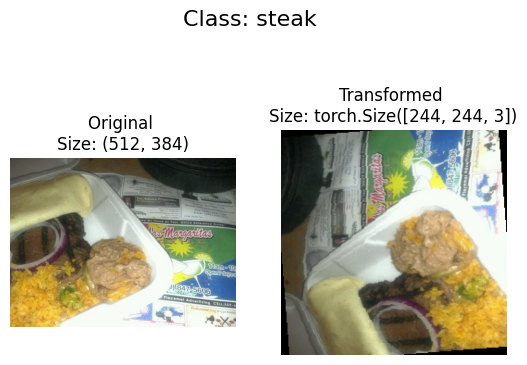

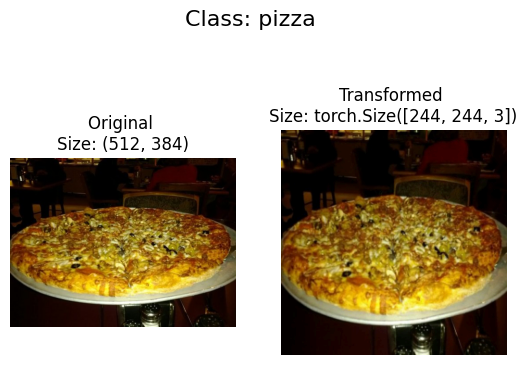

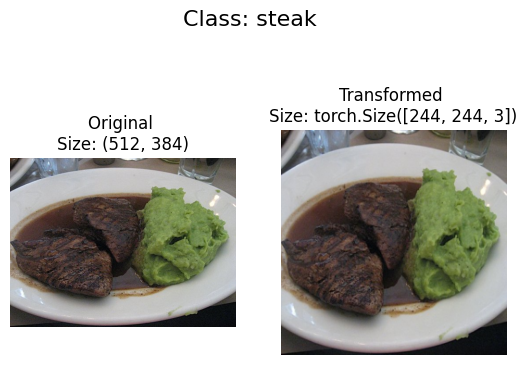

In [ ]:
image_path_l = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(image_paths = image_path_l,
                        transform = train_transforms,
                        n=3,
                        seed=None)

## 7. model_0: tiny vgg wo data augmentation!

In [ ]:
simple_transform = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.ToTensor()
    ]
)


In [ ]:
from torchvision import datasets
train_datasimple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_datasimple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dlsimple = DataLoader(train_datasimple,
                            batch_size = BATCH_SIZE,
                            shuffle=True,
                            num_workers = NUM_WORKERS)
test_dlsimple = DataLoader(test_datasimple,
                            batch_size = BATCH_SIZE,
                            shuffle=False,
                            num_workers = NUM_WORKERS)
train_dlsimple, test_dlsimple



(<torch.utils.data.dataloader.DataLoader at 0x7aee751b1750>,
 <torch.utils.data.dataloader.DataLoader at 0x7aee75194250>)

### 7.2 tiny vgg model class

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
               super().__init__()
               self.conv_block1 = nn.Sequential(
                   nn.Conv2d(in_channels=input_shape,
                             out_channels = hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=1),
                   nn.ReLU(),
                   nn.Conv2d(in_channels=hidden_units,
                             out_channels= hidden_units,
                             kernel_size=3,
                             stride=1,
                             padding=1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=2,
                                padding=1) # Changed padding from 2 to 1
               )
               self.conv_block2 = nn.Sequential(
                   nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding =1),
                   nn.ReLU(),
                   nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding =1),
                   nn.ReLU(),
                   nn.MaxPool2d(2)
               )

               # Calculate the input features for the linear layer dynamically
               dummy_input = torch.randn(1, input_shape, 64, 64) # Assuming input images are 64x64
               output_from_conv = self.conv_block2(self.conv_block1(dummy_input))
               flattened_features = output_from_conv.view(output_from_conv.size(0), -1)
               linear_input_features = flattened_features.size(1)


               self.classifier = nn.Sequential(
                   nn.Flatten(),
                   nn.Linear(in_features=linear_input_features, # Use calculated features
                             out_features=output_shape)
               )

  def forward(self, x:torch.Tensor):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    x = self.classifier(x)
    return x


torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 7.3 forward pass on single image

In [ ]:
img_batch, label_batch = next(iter(train_dlsimple))
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
model_0.eval()
with torch.inference_mode():
  pred = model_0(img_single.to(device))
  print(label_single)

tensor(1)


### 7.4 torchinfo => shapes

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 33, 33]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 33, 33]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 33, 33]           910
│    └─ReLU: 2-7                         [1, 10, 33, 33]           --
│    └─Conv2d: 2-8                       [1, 10, 33, 33]           910
│    └─ReLU: 2-9                         [1, 10, 33, 33]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 7.5 train&test loop functions

In [ ]:
def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0,0
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)
    batch_loss = loss_fn(y_pred, y) # Assign loss to a new variable
    train_loss += batch_loss.item() # Use batch_loss
    optimizer.zero_grad()
    batch_loss.backward() # Use batch_loss
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module):
  model.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():

    for batch, (X,y) in enumerate(dataloader):
      X,y = X.to(device), y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_lbl = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_lbl ==y).sum().item()/len(test_pred_lbl))
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int = 5):

    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

### 7.7 putting it all together

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr =0.001)


from timeit import default_timer as timer
start_time = timer()

#trainning
model_0_res = train(model = model_0,
                    train_dataloader = train_dlsimple,
                    test_dataloader = test_dlsimple,
                    loss_fn = loss_fn,
                    optimizer = optimizer,
                    epochs = NUM_EPOCHS

                    )
end_time = timer()

print(f"total trainning time: {end_time-start_time:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1179 | train_acc: 0.2891 | test_loss: 1.1268 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.1042 | train_acc: 0.3125 | test_loss: 1.1255 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.0956 | train_acc: 0.2930 | test_loss: 1.1312 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.1109 | train_acc: 0.3125 | test_loss: 1.1256 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.3047 | test_loss: 1.0989 | test_acc: 0.2604
total trainning time: 13.166


### 7.8 loss curves

In [ ]:
model_0_res.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loss(results: Dict[str, List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_acc = results["test_acc"] # Corrected variable name

  print(f"Length of train_loss: {len(loss)}")
  print(f"Length of test_loss: {len(test_loss)}")
  print(f"Length of train_acc: {len(accuracy)}")
  print(f"Length of test_acc: {len(test_acc)}")


  epochs = range(len(results["train_loss"]))
  plt.figure(figsize=(15,7))


  plt.subplot(1,2,1)
  plt.plot(epochs, np.array(loss), label ="train_loss")
  plt.plot(epochs, np.array(test_loss), label="test_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, np.array(accuracy), label ="accuracy")
  plt.plot(epochs, np.array(test_acc), label="test_accuracy") # Corrected variable name
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

Length of train_loss: 5
Length of test_loss: 5
Length of train_acc: 5
Length of test_acc: 5


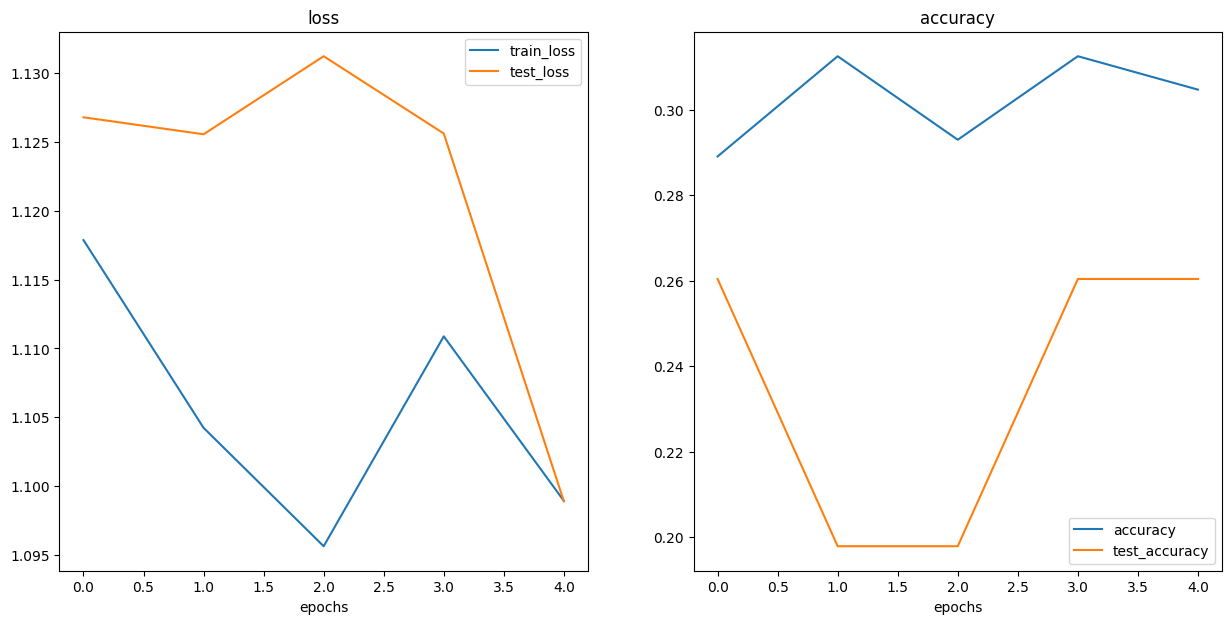

In [ ]:
plot_loss(model_0_res)

## 9. tiny VGG WITH Data Augmentation

In [ ]:
train_transforms_trivial_augment = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()]
)

test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()]
)

In [ ]:
train_data_aug = datasets.ImageFolder(train_dir, transform=train_transforms_trivial_augment)
test_data_aug = datasets.ImageFolder(test_dir, transform = test_transform)

train_data_aug, test_data_aug

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
import os
bs = 32
nw = os.cpu_count()

torch.manual_seed(42)
train_dlaug = DataLoader(train_data_aug,
                         batch_size = bs,
                         shuffle=True,
                         num_workers=nw)

test_dl_simple = DataLoader(test_datasimple,
                         batch_size = bs,
                         shuffle=False,
                         num_workers=nw)
train_dlaug, test_dl_simple

(<torch.utils.data.dataloader.DataLoader at 0x7aee81d06310>,
 <torch.utils.data.dataloader.DataLoader at 0x7aee61338f90>)

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_aug.classes)).to(device)
model_1

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=5
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

from timeit import default_timer as Timer
start_time = timer()
model_1_res = train(model=model_1,
                    train_dataloader=train_dlaug,
                    test_dataloader=test_dl_simple,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    epochs=epochs)
end_time=timer()
print("time: {end_time-start_time:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0997 | train_acc: 0.4141 | test_loss: 1.1031 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0826 | train_acc: 0.4258 | test_loss: 1.1144 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0690 | train_acc: 0.4258 | test_loss: 1.1456 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1160 | train_acc: 0.3047 | test_loss: 1.1458 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0751 | train_acc: 0.4805 | test_loss: 1.1423 | test_acc: 0.2500
time: {end_time-start_time:.3f}


Length of train_loss: 5
Length of test_loss: 5
Length of train_acc: 5
Length of test_acc: 5


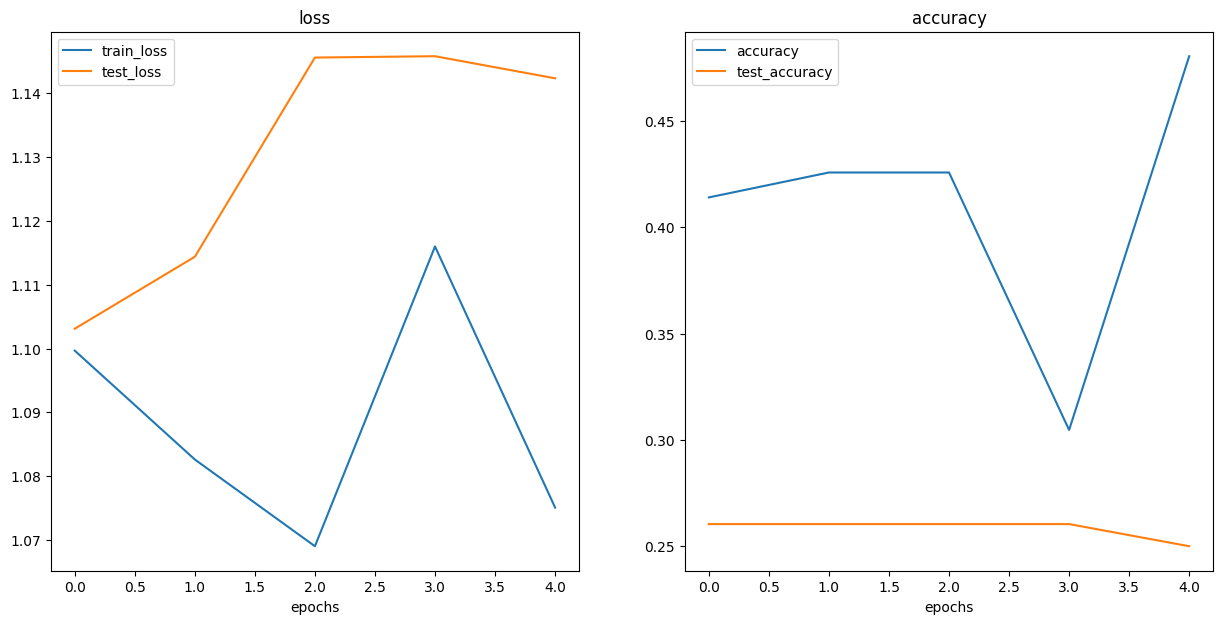

In [ ]:
plot_loss(model_1_res)

## 11. custom img prediction

In [ ]:
import requests
custom_img_path = data_path / "04-pizza-dad.jpeg"

if not custom_img_path.is_file():
  with open(custom_img_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    f.write(request.content)

else:
  print("already exist")

In [ ]:
import torchvision
custom_img_uint8 = torchvision.io.read_image(str(custom_img_path))
print(f"custom_img_uint8: {custom_img_uint8}")


custom_img_uint8: tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)


In [ ]:
#change to model's data's data type in order to use it
custom_img = torchvision.io.read_image(str(custom_img_path)).type(torch.float32)
custom_img = custom_img / 255.
print(custom_img.dtype)

torch.float32


In [ ]:
#resizing the dimensions
custom_img_trans = transforms.Compose([
    transforms.Resize((64,64))
])
custom_img_transed = custom_img_trans(custom_img)
print(custom_img.shape)
print(custom_img_transed.shape)

torch.Size([3, 4032, 3024])
torch.Size([3, 64, 64])


In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_img_bs = custom_img_transed.unsqueeze(dim=0)
  custom_img_pred = model_1(custom_img_bs.to(device))

In [ ]:
custom_img_pred

tensor([[-0.0439,  0.0176, -0.2529]])

In [ ]:
custom_img_pred_probs = torch.softmax(custom_img_pred, dim=1)
custom_img_lbl = torch.argmax(custom_img_pred_probs, dim=1)
print(f"prediction label: {custom_img_lbl}")

prediction label: tensor([1])


In [ ]:
custom_img_class = class_names[custom_img_lbl.cpu()]
custom_img_class

'steak'

### building a function

In [ ]:
def pred_plot(model: torch.nn.Module,
              img_path: str,
              class_names: List[str] = None,
              transform=None,
              device: torch.device=device):
  target_img = torchvision.io.read_image(str(img_path)).type(torch.float32)
  target_img = target_img /255.
  if transform:
    target_img = transform(target_img)
  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_img = target_img.unsqueeze(dim=0)
    img_pred = model(target_img.to(device))
  img_probs = torch.softmax(img_pred, dim=1)
  img_lbl = torch.argmax(img_probs, dim=1)
  plt.imshow(target_img.squeeze().permute(1,2,0))
  plt.title(class_names[img_lbl.cpu()])
  plt.axis(False)

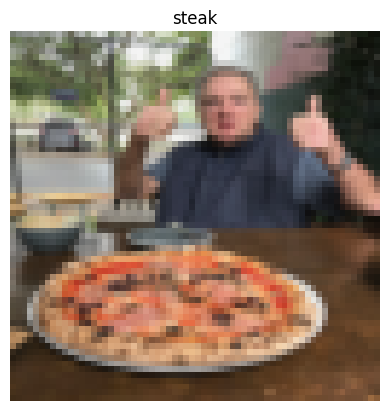

In [ ]:
pred_plot(model=model_1,
          img_path=custom_img_path,
          class_names=class_names,
          transform=custom_img_trans,
          device=device)

In [ ]:
# Make predictions with model_1 on the test data
model_1.eval()
model_1_pred_logits = []
with torch.inference_mode():
    for X, y in test_dl_simple:
        X, y = X.to(device), y.to(device)
        y_pred_logits = model_1(X)
        model_1_pred_logits.append(y_pred_logits.cpu())

model_1_pred_logits = torch.cat(model_1_pred_logits)

# Convert logits to prediction labels
model_1_pred_labels = torch.argmax(model_1_pred_logits, dim=1)

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return f"accuracy: {acc:.2f}%"

In [ ]:
#wanna get model_1 accuracy percentage using accuracy_fn built in function
# from helper_functions import accuracy_fn # Commented out the import
model_1_acc = accuracy_fn(y_true=torch.tensor(test_data.targets), # Convert list to tensor
                          y_pred=model_1_pred_labels) # Use the generated prediction labels
model_1_acc

'accuracy: 32.00%'